# 데이터 사이언스 프로젝트

In [1]:
!pip install catboost
!pip install category_encoders
!pip install optuna
!pip install lightgbm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install optuna

     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 82 kB 355 kB/s 
     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 209 kB 52.6 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 149 kB 74.6 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 112 kB 64.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=6ba836900670475feb5df2f2cee2b9e8ce5d875a4f193548d07c8efe95eb2058
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to rem

In [2]:
import warnings
import pandas as pd
pd.options.display.max_columns=999
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from category_encoders.ordinal import OrdinalEncoder
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
train = pd.read_csv("/content/drive/MyDrive/235713_신용카드 사용자 연체 예측 AI 경진대회_data (4)/open/train.csv")
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
test = pd.read_csv("/content/drive/MyDrive/235713_신용카드 사용자 연체 예측 AI 경진대회_data (4)/open/test.csv")
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [5]:
print(train.shape)
print(test.shape)

(26457, 20)
(10000, 19)


# train 정보 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
for df in [train,test]:
  df["index"] = df["index"].astype(object) # index의 type유형을 object로 변환
  df["FLAG_MOBIL"] = df["FLAG_MOBIL"].astype(object) # 이진변수의 type유형을 object로 변환
  df["work_phone"] = df["work_phone"].astype(object) 
  df["phone"] = df["phone"].astype(object) 
  df["email"] = df["email"].astype(object) 

In [8]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,20.000000,0.000000,2.000000


In [9]:
null_train = train.isnull().sum().sort_values(ascending=False)
null_test = test.isnull().sum().sort_values(ascending=False)
missing = pd.DataFrame({"missing_train":null_train})
missing["missing_test"] = null_test
missing["percent_train"] = null_train / len(train)
missing["percent_test"] = null_test / len(test)
missing.head()

,missing_train,missing_test,percent_train,percent_test
occyp_type,8171,3152.0,0.308841,0.3152
credit,0,NaN,0.000000,NaN
family_type,0,0.0,0.000000,0.0000
gender,0,0.0,0.000000,0.0000
car,0,0.0,0.000000,0.0000


* train 정보를 확인하니 occyp_type에 null값이 존재하고 이를 직접 확인 해보니 8171개의 null값이 존재한다. test 데이터는 3152개의 null값이 occyp_type에 존재한다.
* chid_num의 최대 값이 19로 3분위수 보다 많이 높은 값을 갖는다.
* DAYS_EMPLOYED의 최대 값이 365243으로 양수의 값을 갖는 사람들이 있다.
* FLAG_MOBIL의 값이 최소 값부터 최대 값까지 전부 1을 갖는다.
* family_size의 최대 값이 20으로 3분위수 보다 많이 높은 값을 가지며 표준편차가 작다

# 데이터 탐색

## 단일 데이터 탐색

### 신용등급의 비율

Text(0.5, 1.0, 'credit의 비율')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


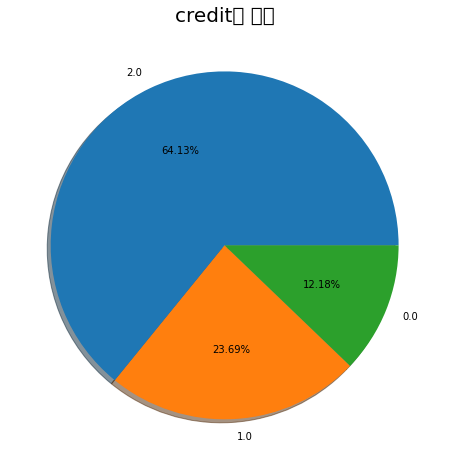

In [10]:
fig,ax = plt.subplots(figsize=(8,8))
ax.pie(train["credit"].value_counts(),labels=train["credit"].value_counts().index,
         autopct="%.2f%%",shadow=True)
plt.title("credit의 비율",size=20)

* 신용등급이 2인 사람들이 가장 많으며 그 다음 1 그 다음이 0이다. 신용등급이 좋은 사람들이 적은 걸 알 수 있다.

### object형 변수의 분포

In [11]:
cat = [col for col in train.columns if (train[col].dtype == object and col != "index")]
cat

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type']

In [12]:
def cat_plot(df,column,credit):

  if column == "occyp_type":
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    sns.countplot(y =df[column],order = df[column].value_counts().index,ax=ax1)
    sns.countplot(y =train[column],hue=df[credit],order = df[column].value_counts().index,ax=ax2)

  else :
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    sns.countplot(df[column],ax=ax1)
    sns.countplot(df[column],hue = df[credit],ax=ax2)
    ax1.tick_params(axis="x",rotation=-45)
    ax2.tick_params(axis="x",rotation=-45)

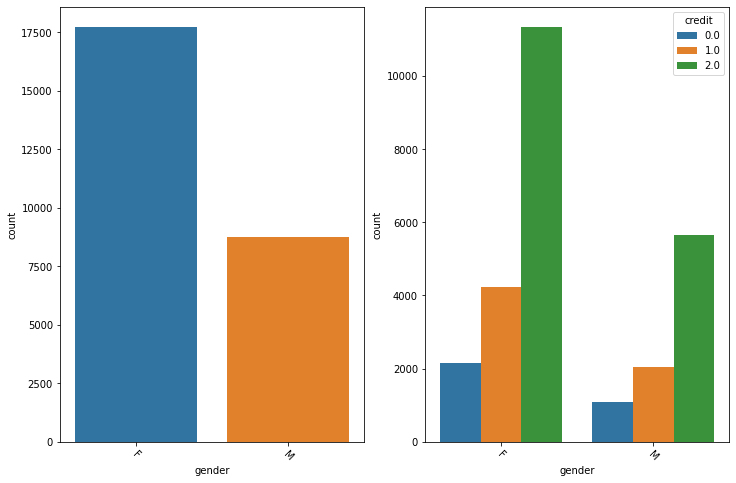

In [13]:
cat_plot(train,"gender","credit") 

* 여성이 남성보다 많으며 남성 여성 모두 신용등급이 좋지 않은 사람들이 더 많은 것을 볼 수 있다.

### 차량 소유 여부에 따른 신용등급 비율

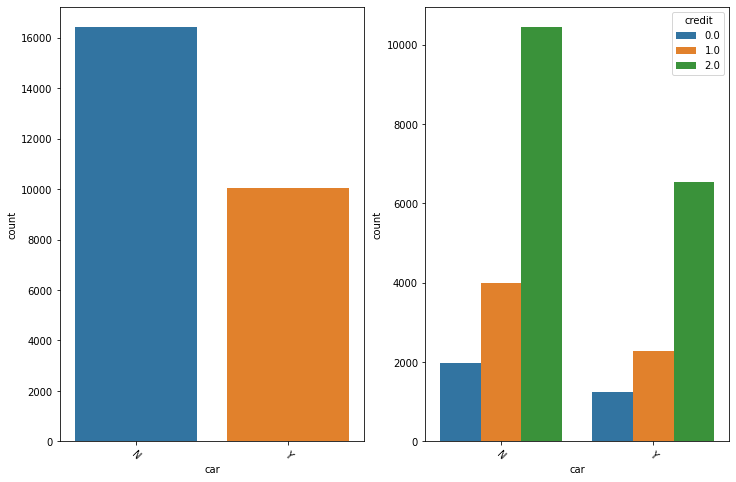

In [14]:
cat_plot(train,"car","credit")

* 차를 소유하지 않은 개인이 많으며 소유 여부 관련없이 신용등급이 2,1,0 순으로 많다.

### 부동산 소유 여부에 따른 신용등급의 비율

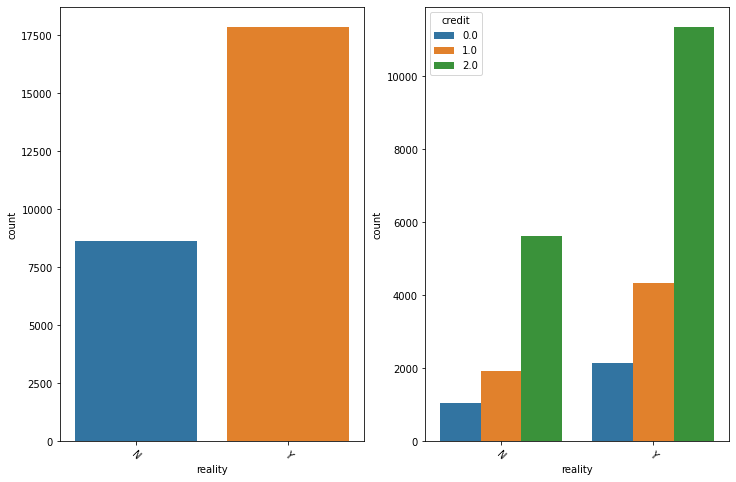

In [15]:
cat_plot(train,"reality","credit")

* 부동산을 소유하는 개인이 많으며 소유 여부 관련없이 신용등급이 2,1,0 순으로 많다.

### 소득유형에 따른 신용등급 비율

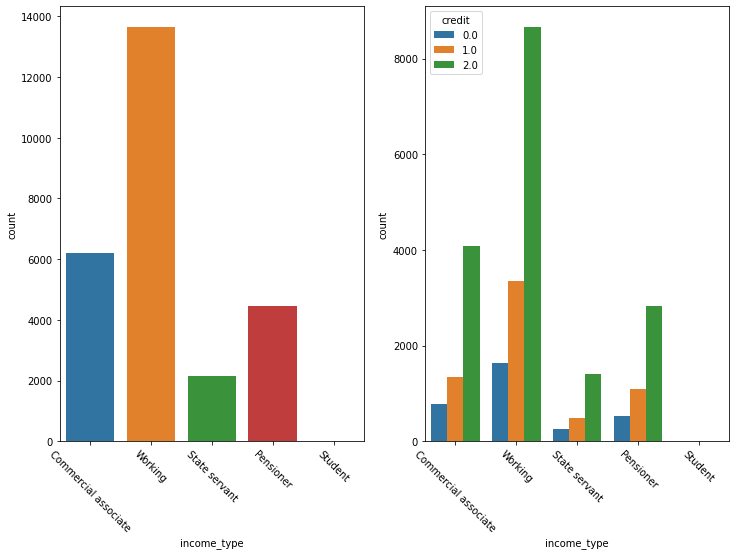

In [16]:
cat_plot(train,"income_type","credit")

* 학생은 소수임을 알 수 있고 모든 소득 분류에서 신용등급은 2,1,0 순을 갖는다.

### 교육 수준에 따른 신용등급 비율

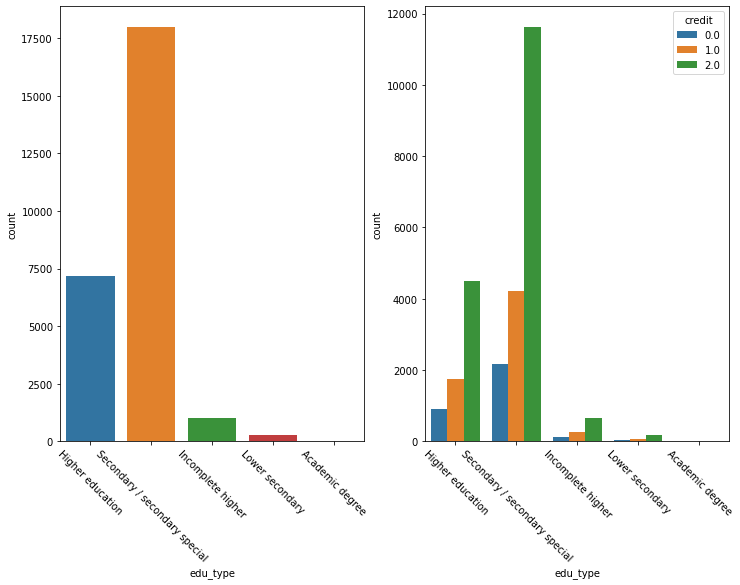

In [17]:
cat_plot(train,"edu_type","credit")

* 교육 수준도 모두 신용등급이 2,1,0순을 갖는다.

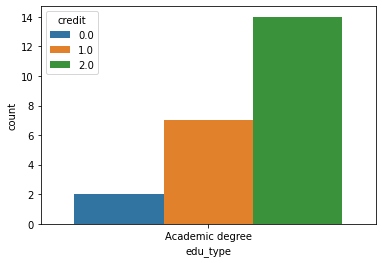

In [18]:
academic = train[train["edu_type"]=="Academic degree"]
sns.countplot(academic["edu_type"],hue=academic["credit"])
# 마찬가지로 가장 좋은 고학력자이지만 신용도가 좋지 않은 사람이 가장 많다.

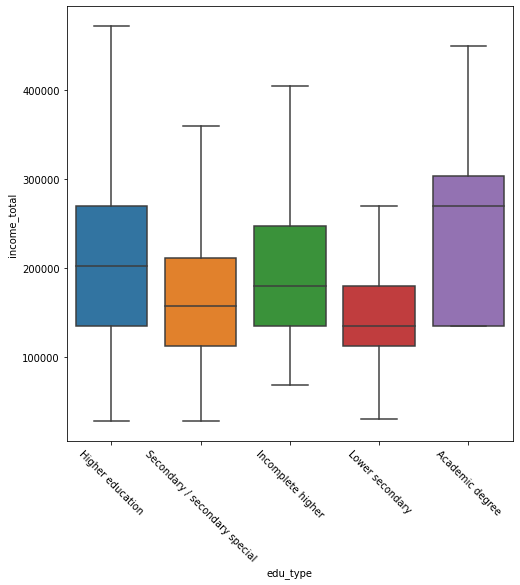

In [19]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.boxplot(train["edu_type"],train["income_total"],showfliers=False,ax=ax)
ax.tick_params(axis="x",rotation=-45)
# 교육수준이 높은 사람은 소득도 비례하지 않을까?
# 학력에 따라 소득의 차이가 있다.

### 가족 유형에 따른 신용등급 비율

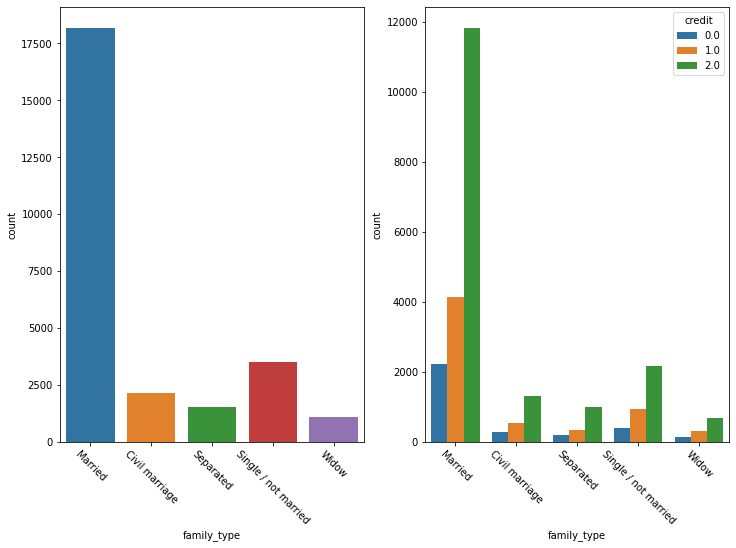

In [20]:
cat_plot(train,"family_type","credit")

* 결혼 유형도 2,1,0의 순을 가지며 특히 Married에서 신용등급이 높은 사람들의 수가 높음을 알 수 있다.

### 가족 형태에 따른 신용등급 비율

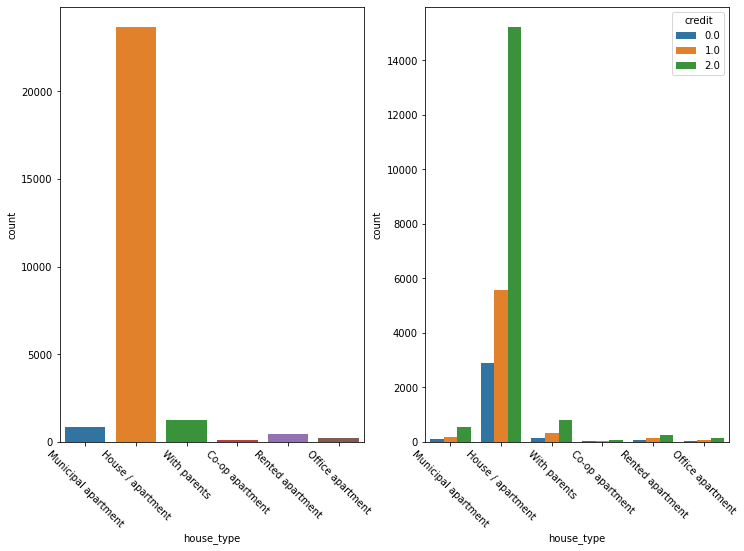

In [21]:
cat_plot(train,"house_type","credit")

* 생활방식 역시 신용등급을 모두 2,1,0 순을 가지며 대부분 사람들은 House / apartment에 산다.

### 업무용 휴대전화에 따른 신용등급 비율

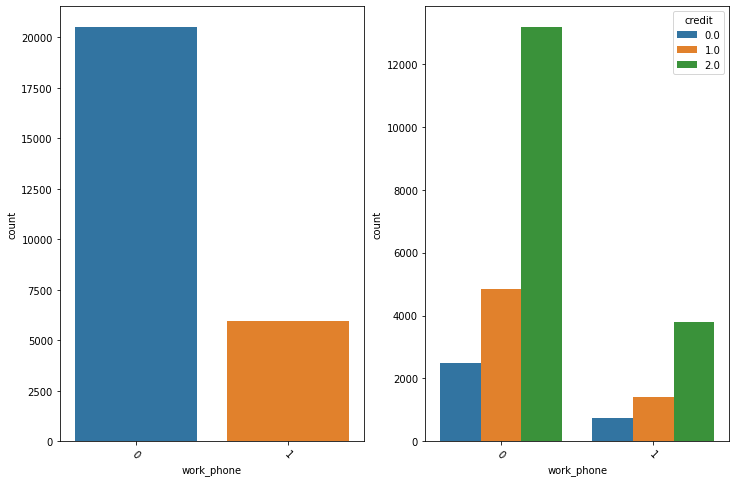

In [22]:
cat_plot(train,"work_phone","credit")

* 업무용 휴대전화에 따른 신용등급도 2,1,0 순으로 많다.

### 개인용 휴대전화에 따른 신용등급 비율

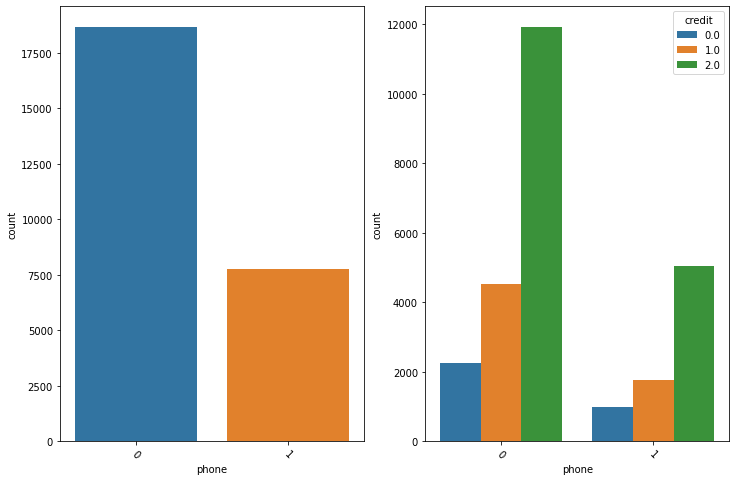

In [23]:
cat_plot(train,"phone","credit")

* 역시 2,1,0 순서대로이다.

### 이메일 소유여부에 따른 신용등급 비율

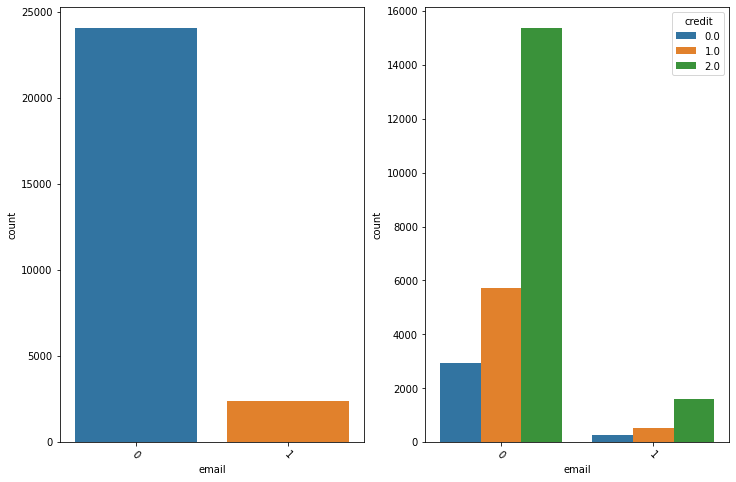

In [24]:
cat_plot(train,"email","credit")

* 이메일 또한 신용등급은 2,1,0 순으로 많다.

### 직업유형에 따른 신용등급 비율

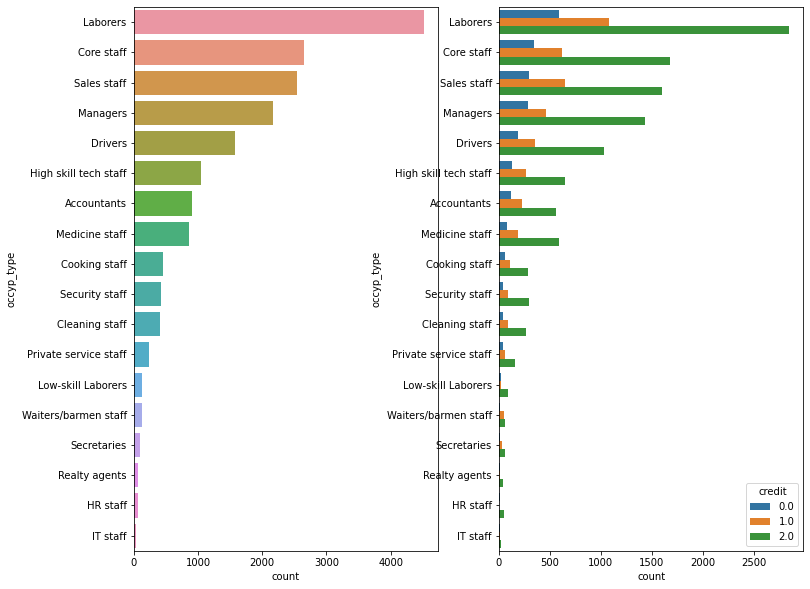

In [25]:
cat_plot(train,"occyp_type","credit")

* 직업유형에 따른 신용등급 비율도 비슷하지만 몇몇 유형은 차이가 있다.

In [26]:
num = [col for col in train.columns if (train[col].dtype != "object" and col != "credit")]
num

['child_num',
 'income_total',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'family_size',
 'begin_month']

In [27]:
def numerical_plot(df,column,credit):
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(1,2,1)
  ax2 = fig.add_subplot(1,2,2)
  sns.kdeplot(df[column],ax=ax1)
  sns.kdeplot(df[column],hue=df[credit],ax=ax2)

### 자녀 수에 따른 신용등급 비율

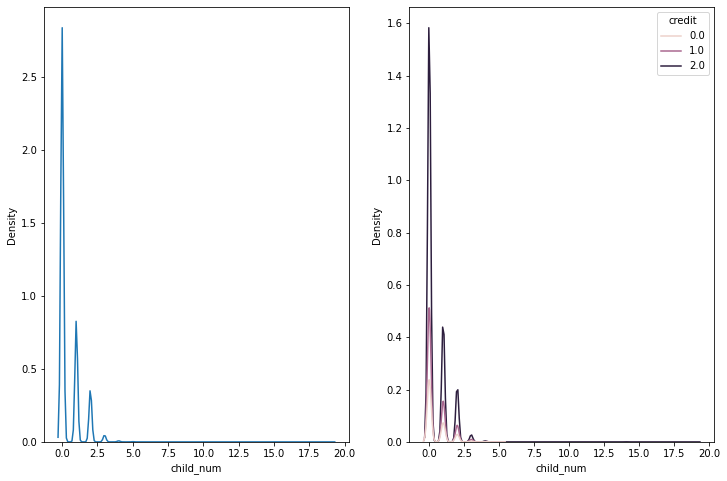

In [28]:
numerical_plot(train,"child_num","credit")


* 신용등급에 따라 자녀수는 비슷한것을 알 수 있으며 값의 범위가 넓은 것을 볼 수 있다.

### 연간소득에 따른 신용등급의 비율

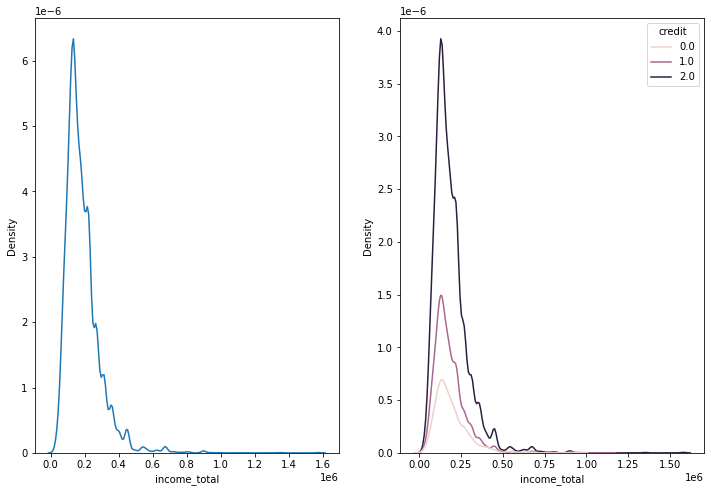

In [29]:
numerical_plot(train,"income_total","credit")


* 연간소득의 범위도 넓은 것을 볼 수 있고 , 신용등급이 좋을수록 연간소득이 더 높은 것을 볼 수 있다.

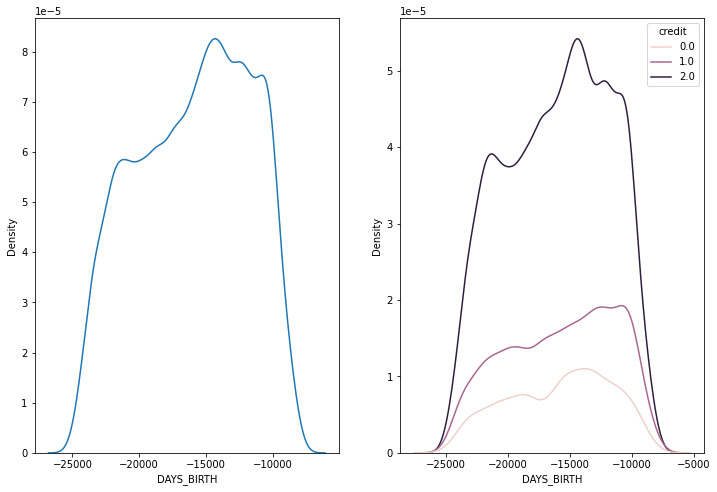

In [30]:
numerical_plot(train,"DAYS_BIRTH","credit")


* 등급별로 큰 차이가 없다.

### 업무기간에 따른 신용등급의 비율

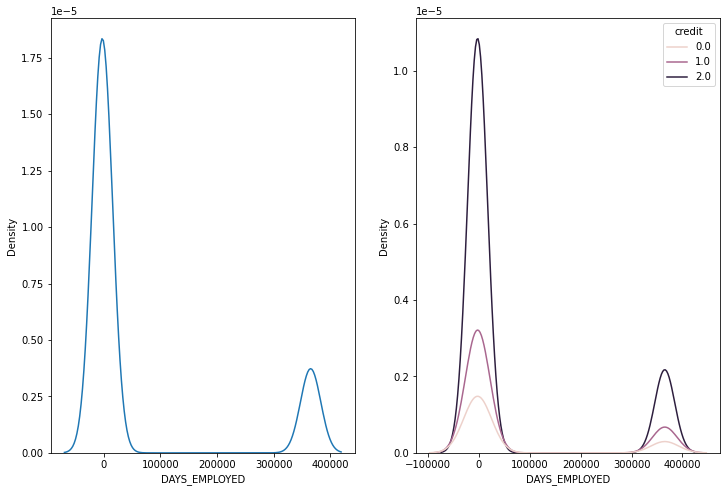

In [31]:
numerical_plot(train,"DAYS_EMPLOYED","credit")

* 365243이라는 이상 값 때문에 확인하지 못하여 처리 후 다시 확인

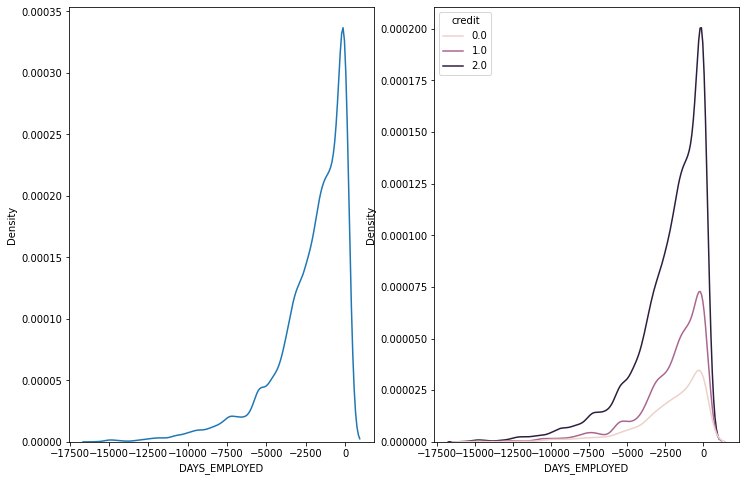

In [32]:
train[train["DAYS_EMPLOYED"]==0] # 취업을 하지 못한 사람들을 위한 값이 있는지 확인. 없다.
train[train["DAYS_EMPLOYED"]==365243]["income_type"].unique() # 365243을 갖는 사람들은 직업이 존재하지 않음 근데 소득은 가지고 있음 -> 이들의 소득 유형 파악 -> 모두 은퇴한 뒤 연금을 받는 사람들임을 알 수 있다.
train["DAYS_EMPLOYED"] = train["DAYS_EMPLOYED"].replace(365243,1) # 따라서 이들의 값을 365243에서 1로 변경 (0으로 하지 않은 이유는 나중에 변수 만들 때 계산 용이하게 하기 위해서이며 0은 직업을 갖지 못한 사람들의 의미를 갖고 있는데 은퇴한 사람들은 직업을 갖지 못한 것은 아니기 때문이다.)
numerical_plot(train,"DAYS_EMPLOYED","credit")
test["DAYS_EMPLOYED"] = test["DAYS_EMPLOYED"].replace(365243,1)


### 가족 규모에 따른 신용등급의 비율

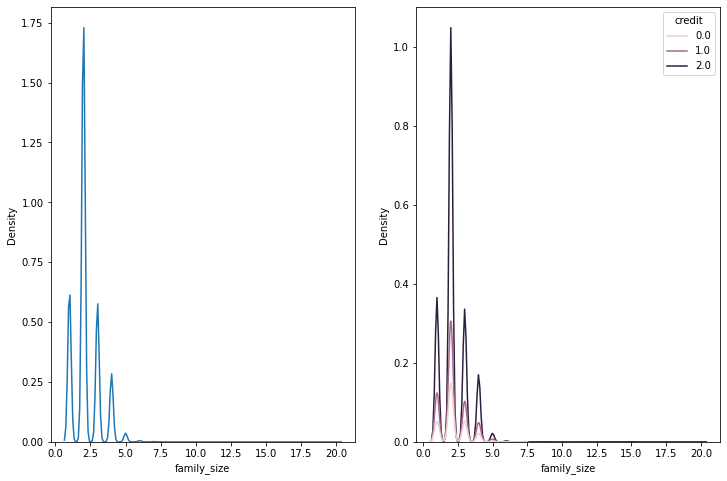

In [33]:
numerical_plot(train,"family_size","credit") 


* 신용등급에 따라 차이가 나지는 않지만 범위가 넓은 것을 알 수 있다.

### 신용카드 발급 월에 따른 신용등급 비율

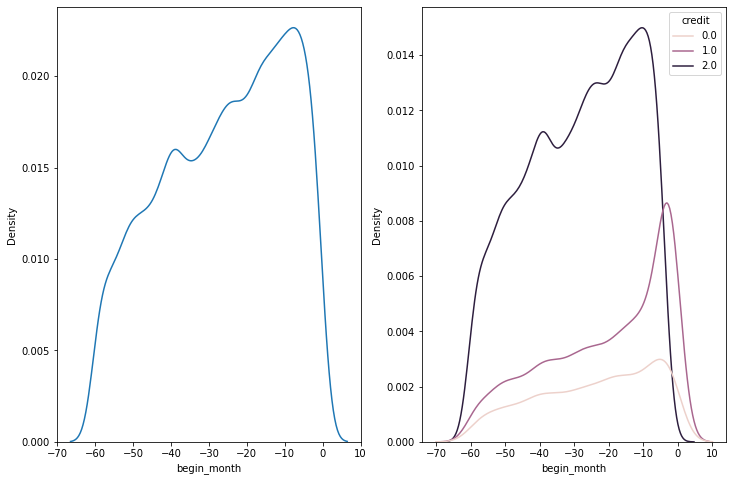

In [34]:
numerical_plot(train,"begin_month","credit")


* 카드를 발급한지 얼마 안 된 사람들은 신용 등급이 더 좋은 것을 볼 수 있다.

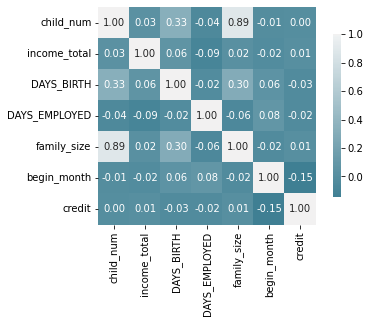

In [35]:
num += ["credit"]
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(train[num].corr(),annot=True,fmt=".2f",center=True,square=True,cmap=cmap,cbar_kws={"shrink": .75})

* 피어슨 상관계수를 보면 child_num과 family_size의 상관이 큰 것으로 보인다.
* DAYS_BIRTH와 DAYS_EMPLOYED 역시 어느정도 강한 상관관계를 갖는다.
* credit과 높은 상관관계를 갖는 변수는 없어 보인다.

# train 데이터 test 데이터 분포

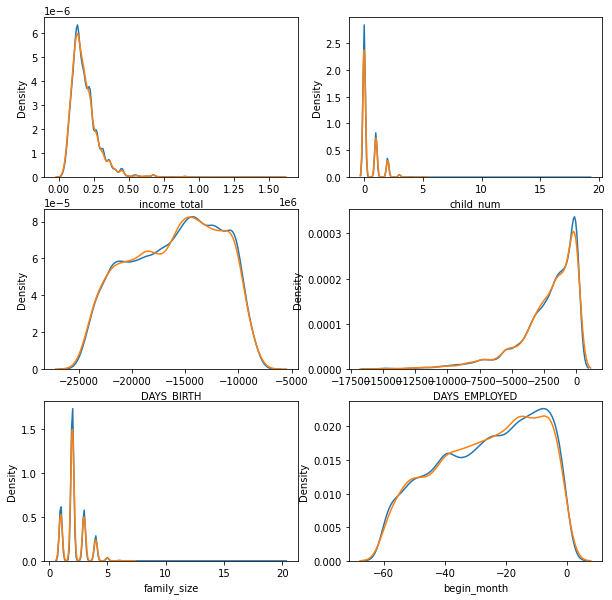

In [36]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
sns.kdeplot(train["income_total"],ax=ax[0,0])
sns.kdeplot(test["income_total"],ax=ax[0,0])

sns.kdeplot(train["child_num"],ax=ax[0,1])
sns.kdeplot(test["child_num"],ax=ax[0,1])

sns.kdeplot(train["DAYS_BIRTH"],ax=ax[1,0])
sns.kdeplot(test["DAYS_BIRTH"],ax=ax[1,0])

sns.kdeplot(train["DAYS_EMPLOYED"],ax=ax[1,1])
sns.kdeplot(test["DAYS_EMPLOYED"],ax=ax[1,1])

sns.kdeplot(train["family_size"],ax=ax[2,0])
sns.kdeplot(test["family_size"],ax=ax[2,0])

sns.kdeplot(train["begin_month"],ax=ax[2,1])
sns.kdeplot(test["begin_month"],ax=ax[2,1])

* train 데이터셋과 test데이터 셋의 데이터 분포가 다르다면 overfitting이 발생할 수 있으므로 확인하는 과정

# 데이터 전처리

In [37]:
train[train[train.columns.drop("index")].duplicated(keep = False)].sort_values(["income_total"])[0:3]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
23988,23988,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,1,1,0,0,0,NaN,2.0,-41.0,2.0
2390,2390,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,1,1,0,0,0,NaN,2.0,-41.0,2.0
6274,6274,F,N,N,0,33300.0,Pensioner,Secondary / secondary special,Married,Office apartment,-19605,1,1,0,0,0,NaN,2.0,-41.0,2.0


* train 데이터에 중복 데이터가 있는지 확인 했는데
중복데이터가 있음을 확인했다. 
중복 데이터가 갖는 의미가 뭘까? 
이를 더 확인 해보기 위해 데이터를 추가로 확인

In [38]:
train[train.drop(["index","begin_month"],axis=1).duplicated(keep = False)].sort_values(["income_total","DAYS_EMPLOYED"])[0:4]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1030,1030,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,1,1,0,0,0,NaN,2.0,-6.0,1.0
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,1,1,0,0,0,NaN,2.0,-2.0,1.0
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,1,1,0,0,0,NaN,2.0,-27.0,1.0
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,1,1,0,0,0,NaN,2.0,-24.0,1.0


* 위의 데이터는 인덱스와 신용카드 발급월을 제외한 모든 컬럼을 기준으로 동일한 데이터가 있는지 확인을 했다. 확인하니 신용카드 발급월을 제외한 모든 컬럼이 동일했다.
이를 어떻게 해석하면 될까?
정확한 개인정보 변수가 없기 때문에 모두 같은 사람이라고 확신할 수는 없지만
train 데이터가 총 26000개정도 되는데 이러한 중복 데이터의 개수가 20000개가 넘는다. 우연치고 다른 인물의 정보가 같기에는 너무 많은 데이터라고 판단하였다.
따라서 동일인물이 여러 신용카드를 발급받았다고 판단하였다.

따라서 동일 인물임을 알려주는 컬럼을 생성

In [39]:
for df in [train,test]:
  df["personal_information"] = df[["income_type","edu_type","family_type","house_type","income_total","DAYS_BIRTH","DAYS_EMPLOYED","occyp_type","child_num","work_phone","phone","email","gender","car","reality"]].apply(lambda x: "_".join(x.astype(str)),axis=1)

  

In [40]:
train[((train["family_size"] -train["child_num"]) <0)==True] # family_size에 child_num이 포함되어 있다. 근데 child_num > family_size인 경우가 있다.

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_information
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0,Working_Secondary / secondary special_Married_...


In [41]:
train[train["personal_information"]=="Working_Secondary / secondary special_Married_House / apartment_225000.0_-14776_-2212_Drivers_2_0_0_0_M_Y_N"] # 해당 데이터 확인 # 동일 데이터 모두 family_size가 4이다.
train.loc[14900,"family_size"] = 4.0
train[train["personal_information"]=="Working_Secondary / secondary special_Married_House / apartment_225000.0_-14776_-2212_Drivers_2_0_0_0_M_Y_N"] # 해당 데이터 확인 # 동일 데이터 모두 family_size가 4이다.


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_information
657,657,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-51.0,2.0,Working_Secondary / secondary special_Married_...
4587,4587,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-9.0,2.0,Working_Secondary / secondary special_Married_...
12961,12961,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-45.0,2.0,Working_Secondary / secondary special_Married_...
14029,14029,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-30.0,2.0,Working_Secondary / secondary special_Married_...
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-30.0,2.0,Working_Secondary / secondary special_Married_...
15416,15416,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,1,0,0,0,Drivers,4.0,-20.0,0.0,Working_Secondary / secondary special_Married_...


In [42]:
test_child_num_unique = test["child_num"].unique()
test_family_size_unique = test["family_size"].unique()
train_child_num_unique = train["child_num"].unique()
train_family_size_unique = train["family_size"].unique()

print("test 데이터 child_num의 unique 값 {} , test 데이터 family_size의 unique 값 {}".format(test_child_num_unique,test_family_size_unique))
print("train 데이터 chidl_num의 unique 값 {} , train 데이터 family_size의 unique 값 {}".format(train_child_num_unique,train_family_size_unique))

test 데이터 child_num의 unique 값 [0 1 2 3 5 4] , test 데이터 family_size의 unique 값 [2. 1. 3. 4. 5. 7. 6.]
train 데이터 chidl_num의 unique 값 [ 0  1  2  3  4  5 14 19  7] , train 데이터 family_size의 unique 값 [ 2.  3.  4.  1.  5.  6.  7. 15. 20.  9.]


In [43]:
train["child_num"].value_counts() # 14와 19 값의 수도 적은데 범위가 크다. train데이터와 test데이터의 분포가 달라지는 것을 막기 위해 조정해줬다.
train["child_num"] = train["child_num"].replace({14:9,19:11})

train["family_size"].value_counts() # 마찬가지로 가족의 수가 15 , 20은 값이 적다. train데이터와 test데이터의 분포가 달라지는 것을 막기 위해 조정해줬다.
train["family_size"] = train["family_size"].replace({15:11,20:13})


In [44]:
for df in [train,test]:
  df["income_edu"] = df["income_type"] +"_"+ df["edu_type"]
  df['family_type+house_type'] = df['family_type'] + '_' + df['house_type'] # 결혼여부+생활방식
  df['family_type+edu_type'] = df['family_type'] + '_' + df['edu_type'] # 결혼여부+생활방식
  df['family_type+income_type'] = df['family_type'] + '_' + df['income_type'] # 결혼여부+생활방식
  df['income_type+house_type'] = df['income_type'] + '_' + df['house_type'] # 소득유형+생활방식

In [45]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,personal_information,income_edu,family_type+house_type,family_type+edu_type,family_type+income_type,income_type+house_type
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,1,1,0,1,0,NaN,2.0,-60.0,Pensioner_Secondary / secondary special_Civil ...,Pensioner_Secondary / secondary special,Civil marriage_House / apartment,Civil marriage_Secondary / secondary special,Civil marriage_Pensioner,Pensioner_House / apartment
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0,State servant_Higher education_Married_House /...,State servant_Higher education,Married_House / apartment,Married_Higher education,Married_State servant,State servant_House / apartment
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0,Working_Secondary / secondary special_Married_...,Working_Secondary / secondary special,Married_House / apartment,Married_Secondary / secondary special,Married_Working,Working_House / apartment
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0,Commercial associate_Secondary / secondary spe...,Commercial associate_Secondary / secondary spe...,Married_House / apartment,Married_Secondary / secondary special,Married_Commercial associate,Commercial associate_House / apartment
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0,State servant_Higher education_Married_House /...,State servant_Higher education,Married_House / apartment,Married_Higher education,Married_State servant,State servant_House / apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,Working_Incomplete higher_Married_House / apar...,Working_Incomplete higher,Married_House / apartment,Married_Incomplete higher,Married_Working,Working_House / apartment
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,Working_Secondary / secondary special_Civil ma...,Working_Secondary / secondary special,Civil marriage_House / apartment,Civil marriage_Secondary / secondary special,Civil marriage_Working,Working_House / apartment
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,Working_Secondary / secondary special_Married_...,Working_Secondary / secondary special,Married_House / apartment,Married_Secondary / secondary special,Married_Working,Working_House / apartment
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,Commercial associate_Secondary / secondary spe...,Commercial associate_Secondary / secondary spe...,Married_House / apartment,Married_Secondary / secondary special,Married_Commercial associate,Commercial associate_House / apartment


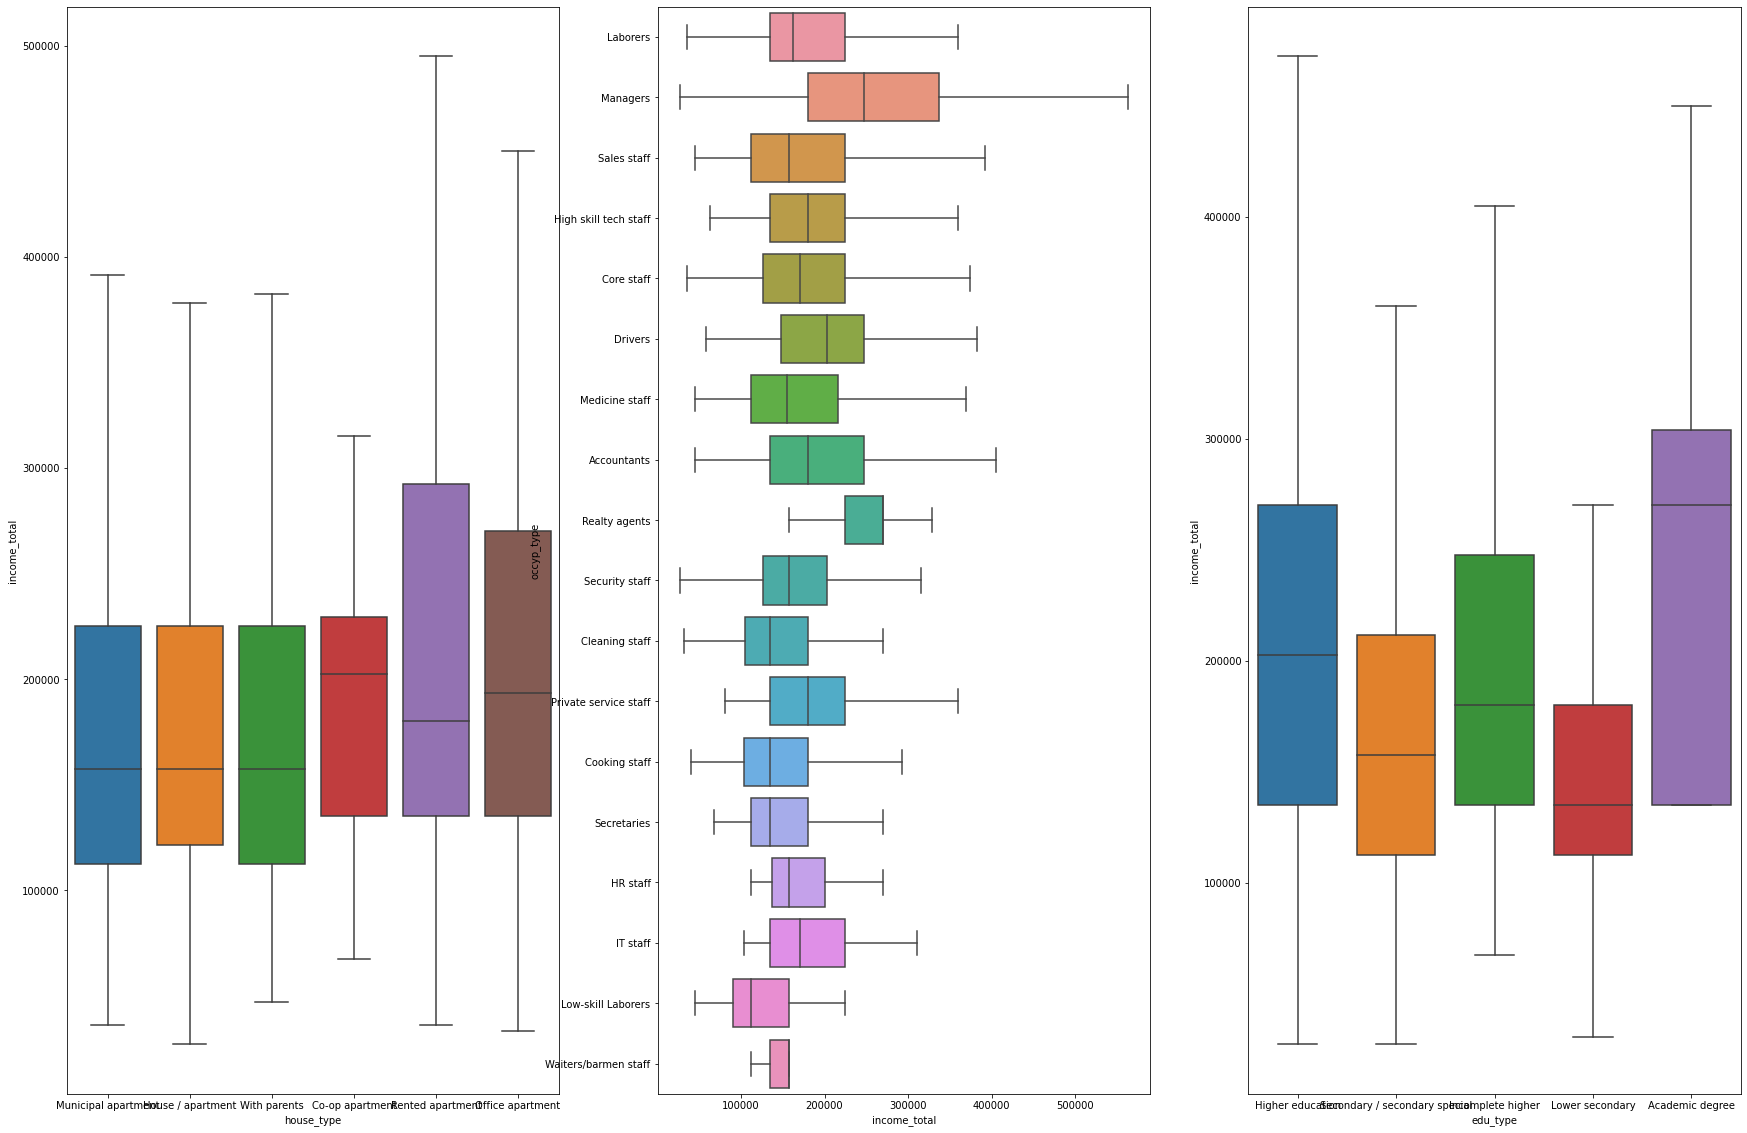

In [46]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(train["house_type"],train["income_total"],ax=ax1,showfliers=False)
sns.boxplot(train["income_total"],train["occyp_type"],ax=ax2,showfliers=False)
sns.boxplot(train["edu_type"],train["income_total"],ax=ax3,showfliers=False)
# 집의 형태 직업 유형 교육수준에 따라 소득이 다른지 확인해 봤다.

In [47]:
for df in [train,test]:
  df["edu_type"] = df["edu_type"].replace({"Higher education":3,"Academic degree":4,"Incomplete higher":2,"Secondary / secondary special":1 ,"Lower secondary":0})
  df["house_type"] = df["house_type"].replace({"With parents":0,"Municipal apartment":1,"House / apartment":2,"Rented apartment":3,"Co-op apartment":4,"Office apartment":5})
  df["occyp_type"] = df["occyp_type"].replace({"Low-skill Laborers":0,"Cooking staff":1,"Cleaning staff":2,"Waiters/barmen staff":3,"Medicine staff":4,"Secretaries":5,"Sales staff":6,"Security staff":7,"Laborers":8,"Core staff":13,"HR staff":11,"High skill tech staff":12,
"Private service staff":9,"IT staff":10,"Accountants":14,"Drivers":15,"Realty agents":16,"Managers":17})

In [48]:

def agg_func(df):
  b=df.groupby(["gender","car","reality","child_num","income_total","edu_type","family_type","house_type","DAYS_BIRTH","DAYS_EMPLOYED","FLAG_MOBIL","work_phone","email"])["begin_month"].count().to_frame("card_count")
  df= df.join(b,on=["gender","car","reality","child_num","income_total","edu_type","family_type","house_type","DAYS_BIRTH","DAYS_EMPLOYED","FLAG_MOBIL","work_phone","email"])
  return df

train = agg_func(train)
test = agg_func(test)


In [49]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,personal_information,income_edu,family_type+house_type,family_type+edu_type,family_type+income_type,income_type+house_type,card_count
0,0,F,N,N,0,202500.0,Commercial associate,3,Married,1,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,Commercial associate_Higher education_Married_...,Commercial associate_Higher education,Married_Municipal apartment,Married_Higher education,Married_Commercial associate,Commercial associate_Municipal apartment,5
1,1,F,N,Y,1,247500.0,Commercial associate,1,Civil marriage,2,-11380,-1540,1,0,0,1,8.0,3.0,-5.0,1.0,Commercial associate_Secondary / secondary spe...,Commercial associate_Secondary / secondary spe...,Civil marriage_House / apartment,Civil marriage_Secondary / secondary special,Civil marriage_Commercial associate,Commercial associate_House / apartment,9
2,2,M,Y,Y,0,450000.0,Working,3,Married,2,-19087,-4434,1,0,1,0,17.0,2.0,-22.0,2.0,Working_Higher education_Married_House / apart...,Working_Higher education,Married_House / apartment,Married_Higher education,Married_Working,Working_House / apartment,6
3,3,F,N,Y,0,202500.0,Commercial associate,1,Married,2,-15088,-2092,1,0,1,0,6.0,2.0,-37.0,0.0,Commercial associate_Secondary / secondary spe...,Commercial associate_Secondary / secondary spe...,Married_House / apartment,Married_Secondary / secondary special,Married_Commercial associate,Commercial associate_House / apartment,2
4,4,F,Y,Y,0,157500.0,State servant,3,Married,2,-15037,-2105,1,0,0,0,17.0,2.0,-26.0,2.0,State servant_Higher education_Married_House /...,State servant_Higher education,Married_House / apartment,Married_Higher education,Married_State servant,State servant_House / apartment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,1,Married,2,-12079,-1984,1,0,0,0,13.0,4.0,-2.0,1.0,State servant_Secondary / secondary special_Ma...,State servant_Secondary / secondary special,Married_House / apartment,Married_Secondary / secondary special,Married_State servant,State servant_House / apartment,5
26453,26453,F,N,Y,1,180000.0,Working,3,Separated,2,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0,Working_Higher education_Separated_House / apa...,Working_Higher education,Separated_House / apartment,Separated_Higher education,Separated_Working,Working_House / apartment,1
26454,26454,F,Y,N,0,292500.0,Working,1,Civil marriage,0,-10082,-2015,1,0,0,0,13.0,2.0,-25.0,2.0,Working_Secondary / secondary special_Civil ma...,Working_Secondary / secondary special,Civil marriage_With parents,Civil marriage_Secondary / secondary special,Civil marriage_Working,Working_With parents,1
26455,26455,M,N,Y,0,171000.0,Working,2,Single / not married,2,-10145,-107,1,0,0,0,8.0,1.0,-59.0,2.0,Working_Incomplete higher_Single / not married...,Working_Incomplete higher,Single / not married_House / apartment,Single / not married_Incomplete higher,Single / not married_Working,Working_House / apartment,1


In [50]:
for df in [train,test]:
  df["BIRTH/EMPLOYED"] = df["DAYS_BIRTH"] /  df["DAYS_EMPLOYED"]
  df["BIRTH*EMPLOYED"] = df["DAYS_BIRTH"] * df["DAYS_EMPLOYED"] 
  df["income/EMPLOYED"] = df["income_total"]/ df["DAYS_EMPLOYED"]
  df["income*EMPLOED"] = df["income_total"] * df["DAYS_EMPLOYED"] 
  df["income/BIRTH"] = df["income_total"] / df["DAYS_BIRTH"] # 그 나이 때 벌어야 하는소득 인지 상대적 위치
  df["income*BIRTH"] = df["income_total"] * df["DAYS_BIRTH"] 
  
  
  df["BIRTH-EMPLOYED"] = df["DAYS_BIRTH"] - 1.5*df["DAYS_EMPLOYED"]
  df["birth_emplyed_squared_minus"] = (df["DAYS_BIRTH"])**2 - (df["DAYS_EMPLOYED"])**2
  df["birth_emplyed_squared_plus"] = (df["DAYS_BIRTH"])**2 +(df["DAYS_EMPLOYED"])**2
  df["money"] = df["car"].replace({"N":0,"Y":1}) + 1.5*df["reality"].replace({"N":0,"Y":1}) + df["phone"]
  df["income/family_size"] = df['income_total'] / df['family_size']





* 최대한 다양한 특징을 보일 수 있도록 파생변수를 생성하였다. 변수들의 의미는 처음 두개는 나이에 비해 취업을 일찍 했는지 늦게 했는지에 대한 변수이고 , 다음 두개는 직장을 다닌 시간에 대비 얼마나 많은 소득을 얻는지에 대한 변수이고 , 마지막 2개는 나이에 비해 얼마나 많은 소득을 얻는지에 대한 변수이다

In [51]:
for df in [train,test]:
  df["income_total/card_count"] = df["income_total"]/ df["card_count"]
  df["BIRTH_card_count"] = df["DAYS_BIRTH"] /  df["card_count"]
  df["EMPLOYED_card_count"] = df["DAYS_EMPLOYED"] /  df["card_count"]

* object 변수들은 의미를 갖는다기 보다는 모델이 다양한 특징을 학습할 수 있도록 합쳐주었다.

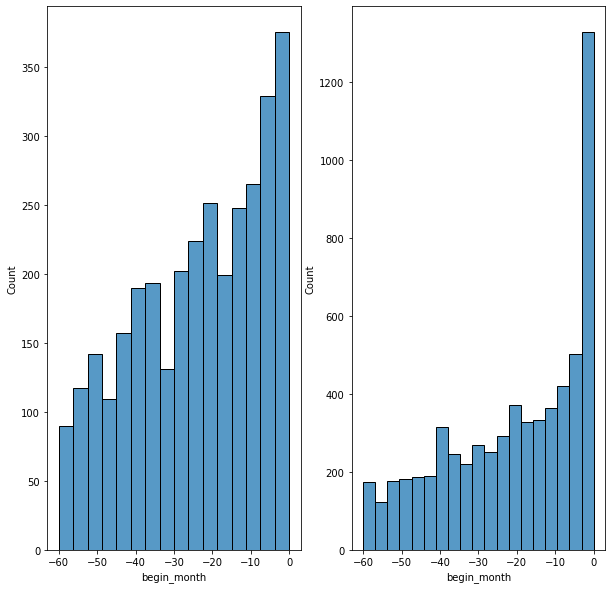

In [52]:
credit0 = train[train["credit"]==0]
credit1 = train[train["credit"]==1]
credit2 = train[train["credit"]==2] 
fig,ax = plt.subplots(1,2,figsize=(10,10))
sns.histplot(credit0["begin_month"],ax=ax[0])
sns.histplot(credit1["begin_month"],ax=ax[1])
# 위에 데이터 탐색 중 신용카드 발급월에서 신용도가 좋은 사람들은 신용카드를 발급 받은지 별로 안됐었다. 따라서 신용도에 따라 신용카드 발급월의 분포를 확인했다.
# 따라서 신용카드 발급월이 3개월 이하인지 알려주는 변수를 만들었다.
for df in [train,test]:
  df["recently_card"] = df["begin_month"].apply(lambda x : 1 if x >= -3 else 0)


In [53]:
for col in ["income_type","edu_type","family_type","house_type","occyp_type"]:
  length = len(set(test[col].unique()) - set(train[col].unique()))
  if length != 0:
    print("{} 컬럼에서 test 데이터에만 있는 특정 값이 있습니다.".format(col))
  else:
    print("{} 컬럼에서 test 데이터에만 있는 특정 값이 없습니다.".format(col))
# 인코딩 할 때 test데이터와 train 데이터의 값이 다를 수 있기 때문에 살펴보았다.

income_type 컬럼에서 test 데이터에만 있는 특정 값이 없습니다.
edu_type 컬럼에서 test 데이터에만 있는 특정 값이 없습니다.
family_type 컬럼에서 test 데이터에만 있는 특정 값이 없습니다.
house_type 컬럼에서 test 데이터에만 있는 특정 값이 없습니다.
occyp_type 컬럼에서 test 데이터에만 있는 특정 값이 있습니다.


In [54]:
le = LabelEncoder()
encoder= OrdinalEncoder()
train["personal_information"] = encoder.fit_transform(train["personal_information"])
test["personal_information"] = encoder.transform(test["personal_information"])

c = list(train.columns[train.dtypes=="object"])
del c[0]
for col in c:
  if col == "ID":
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])
  else :
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train = train.fillna(-1)
test = test.fillna(-1)

In [55]:
train2 = train.drop(["index","credit","FLAG_MOBIL"],axis=1)
test2 = test.drop(["index","FLAG_MOBIL"],axis=1)
# 학습할 때 사용하지 않을 데이터를 제거 하였다.

In [56]:
test2["personal_information"] = test2["personal_information"].astype(int)
train2["occyp_type"] = train2["occyp_type"].astype(int)
test2["occyp_type"] = test2["occyp_type"].astype(int)


In [57]:
cat_cols = ["gender","car","reality","income_type","family_type","work_phone","phone","email","personal_information","family_type+house_type","family_type+edu_type","family_type+income_type","income_type+house_type"]

In [58]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       10000 non-null  int64  
 1   car                          10000 non-null  int64  
 2   reality                      10000 non-null  int64  
 3   child_num                    10000 non-null  int64  
 4   income_total                 10000 non-null  float64
 5   income_type                  10000 non-null  int64  
 6   edu_type                     10000 non-null  int64  
 7   family_type                  10000 non-null  int64  
 8   house_type                   10000 non-null  int64  
 9   DAYS_BIRTH                   10000 non-null  int64  
 10  DAYS_EMPLOYED                10000 non-null  int64  
 11  work_phone                   10000 non-null  int64  
 12  phone                        10000 non-null  int64  
 13  email            

In [59]:
X = train2.copy()
y = train["credit"]
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 10),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)
  
  cat_features = cat_cols
  cat = CatBoostClassifier(**param)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict_proba(X_valid)
  log_score = log_loss(y_valid, cat_pred)

  return log_score

In [60]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'minimize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2021-11-29 05:29:53,899] A new study created in memory with name: cat_parameter_opt


0:	learn: 1.0773054	test: 1.0773548	test1: 1.0775719	best: 1.0775719 (0)	total: 405ms	remaining: 1h 4m 29s


KeyboardInterrupt: ignored

In [ ]:
study.best_params

In [ ]:
best_params = {'colsample_bylevel': 0.8374043008245924,
 'l2_leaf_reg': 2.3140397697111515e-05,
 'learning_rate': 0.010189592979395137,
 'max_bin': 307,
 'max_depth': 8,
 'min_child_samples': 12,
 'n_estimators': 8339,
 'od_type': 'Iter'}

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
def objective(trial):
    params_lgb = {
        "random_state": 42,
        "verbosity": -1,
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        "n_estimators": 10000,
        "objective": "multiclass",
        "metric": "multi_logloss",
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

    model = LGBMClassifier(**params_lgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose=False,
    )

    lgb_pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, lgb_pred)
    
    return log_score

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="lgbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

In [ ]:
best_params_lgb = {'colsample_bytree': 0.8850384088698766,
 'learning_rate': 0.07896186801026692,
 'max_bin': 332,
 'max_depth': 19,
 'min_child_samples': 70,
 'num_leaves': 248,
 'reg_alpha': 5.1240184693818725e-06,
 'reg_lambda': 0.005854652718159227,
 'subsample': 0.5132296384213595,
 'subsample_freq': 1}

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
def objective(trial):
    params_xgb = {
        "random_state": 42,
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators",1000,10000),
        "objective": "multiclass",
        "metric": "multi_logloss",
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 3e-5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 9e-2),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.5, 1,0.1),
        "nthread":-1,
        "lambda": trial.suggest_loguniform("lambda",1e-3,10.0),
        "alpha": trial.suggest_loguniform("alpha",1e-3,10.0),
        "subsample": trial.suggest_categorical("subsample",[0.6,0.7,0.8,1.0]),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 300),
        "gamma":trial.suggest_int("gamma",1,3)
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

    model = XGBClassifier(**params_xgb)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose=False,
    )

    lgb_pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, lgb_pred)
    
    return log_score

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="xgb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

In [ ]:
xgb_best_params = {'alpha': 0.015977662354833867,
 'colsample_bytree': 0.6,
 'gamma': 1,
 'lambda': 0.09749762207436122,
 'learning_rate': 0.030019946952402964,
 'max_depth': 20,
 'min_child_weight': 16,
 'n_estimators': 5669,
 'num_leaves': 247,
 'reg_alpha': 2.1093538577266385e-05,
 'reg_lambda': 0.032726670577840435,
 'subsample': 0.8}

In [ ]:
sf = StratifiedKFold(n_splits=5,random_state=22,shuffle=True)
cat = CatBoostClassifier()
result=0
best_score=0
for train_index, valid_index in sf.split(train2,train["credit"]):
    X_train,X_valid = train2.iloc[train_index], train2.iloc[valid_index]
    y_train,y_valid = train["credit"].iloc[train_index], train["credit"].iloc[valid_index]
    cat.fit(X_train,y_train,eval_set=(X_valid,y_valid),early_stopping_rounds=35,verbose=200,cat_features=cat_cols)
    result += cat.predict_proba(test2) / 10
    best_score+= cat.best_score_["validation"]["MultiClass"] / 10

Learning rate set to 0.114773
0:	learn: 1.0345673	test: 1.0352907	best: 1.0352907 (0)	total: 155ms	remaining: 2m 35s
200:	learn: 0.6845646	test: 0.6858661	best: 0.6856429 (187)	total: 27.4s	remaining: 1m 48s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6856428868
bestIteration = 187

Shrink model to first 188 iterations.
Learning rate set to 0.114773
0:	learn: 1.0352554	test: 1.0341392	best: 1.0341392 (0)	total: 89.3ms	remaining: 1m 29s
200:	learn: 0.6862461	test: 0.6805483	best: 0.6805483 (200)	total: 27s	remaining: 1m 47s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6803389092
bestIteration = 241

Shrink model to first 242 iterations.
Learning rate set to 0.114773
0:	learn: 1.0340694	test: 1.0337598	best: 1.0337598 (0)	total: 88.7ms	remaining: 1m 28s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.6726131365
bestIteration = 151

Shrink model to first 152 iterations.
Learning rate set to 0.114773
0:	learn: 1.0337847	tes

In [ ]:
(best_score*10)/5

0.6779301562847184

In [ ]:
#"tree_method":"gpu_hist"
xgb_hyper= {
    "colsample_bytree":0.4,
    "subsample":0.6,
    "n_estimators":10000,
    "learning_rate":0.05,
    "max_depth":7
}

In [ ]:
lgb=LGBMClassifier()
result_lgb=0
best_score_lgb=0
for train_index, valid_index in sf.split(train2,train["credit"]):
    X_train,X_valid = train2.iloc[train_index], train2.iloc[valid_index]
    y_train,y_valid = train["credit"].iloc[train_index], train["credit"].iloc[valid_index]
    lgb.fit(X_train,y_train,eval_set=(X_valid,y_valid),early_stopping_rounds=30,verbose=200)
    result_lgb += lgb.predict_proba(test2) / 10
    best_score_lgb+= lgb.best_score_["valid_0"]["multi_logloss"] / 10

In [ ]:
importance = pd.DataFrame({"feature":test2.columns,"importance":cat.feature_importances_}).sort_values("importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=importance["importance"],y=importance["feature"])